<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">TFM - UEBA: Detección de Anomalías</p>
<p style="margin: 0; text-align:right;">20231 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Alejandro Ortega de los Ríos
</div>

# Selección  de Características

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
features_df = pd.read_csv('features.csv')
features_df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
features_df.head()

,user,email_size,attachments,recipients,working_day_emails,address_count,weekend_emails,insider,working_day_files,weekend_files,...,tld_net,tld_org,tld_ph,tld_tv,tld_uk,tld_us,role,functional_unit,department,team
0,LAP0338,30020.394184,0.377839,1.638930,13.655072,2,2,0,0,0,...,2.390805,1.505495,1.0,0.0,1.000000,0.0,6,5,3,1
1,MOH0273,30397.402083,0.758333,1.670833,2.962963,2,8,0,23,22,...,6.741848,2.861386,0.0,0.0,1.000000,0.0,29,2,3,4
2,HVB0037,29958.497676,0.000000,1.658367,8.705202,3,13,0,0,0,...,3.812317,3.802260,1.0,0.0,1.654321,0.0,25,1,6,1
3,NWK0215,29828.181548,0.431548,1.651786,1.000000,2,12,0,0,0,...,2.440758,4.394299,0.0,1.0,2.354167,0.0,25,1,6,1
4,LRR0148,29895.532625,0.930197,1.587253,2.941964,2,13,0,3,3,...,5.390052,17.402010,1.0,0.0,3.333333,1.0,14,4,3,-1


## 1. Preprocesamiento

### 1.1. One-Hot Encoding

One-Hot Encoding es una técnica bastante útil para darle una representación numérica a variables categóricas. Esta técnica hace más interpretable los datos de entrada de los algoritmos de aprendizaje, además de evitar sesgos.

In [4]:
#Transformo variables categóricas en vectores
role_array = features_df['role'].values.reshape(-1, 1)
functional_array = features_df['functional_unit'].values.reshape(-1, 1)
department_array = features_df['department'].values.reshape(-1, 1)
team_array = features_df['team'].values.reshape(-1, 1)


# Codifico las variables
one_hot_encoder = OneHotEncoder()

role_ohe = one_hot_encoder.fit_transform(role_array)
functional_ohe = one_hot_encoder.fit_transform(functional_array)
department_ohe = one_hot_encoder.fit_transform(department_array) 
team_ohe = one_hot_encoder.fit_transform(team_array)


# Convierto en lista de vectores
role_vectors = [vec.toarray().flatten() for vec in role_ohe]
functional_vectors = [vec.toarray().flatten() for vec in functional_ohe]
department_vectors = [vec.toarray().flatten() for vec in department_ohe]
team_vectors = [vec.toarray().flatten() for vec in team_ohe]

#Muestro el número de dimensiones que tendría cada variable tras OHE
print('Dimensiones variable role:', np.shape(role_vectors)[1])
print('Dimensiones variable functional:', np.shape(functional_vectors)[1])
print('Dimensiones variable department:', np.shape(department_vectors)[1])
print('Dimensiones variable team:', np.shape(team_vectors)[1])

Dimensiones variable role: 42
Dimensiones variable functional: 7
Dimensiones variable department: 7
Dimensiones variable team: 8


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
En vista a que con la técnica de One Hot Encoding necesito hasta 64 variables para cuantificar numéricamente la organización de una institución, he optado por mantener las variables originales del dataset en formato categórico. 

Estas variables no serán sometidas a la reducción de dimensionalidad ni al escalado de datos, dado que son categóricas.
<br><br>
</div>

### 1.2. Escalado de Datos

En primer lugar, se realizará un escalado usando la técnica de normalización por la diferencia. Este método intenta compensar el efecto de la distancia del valor que tratamos con respecto al máximo de los valores observados. 

In [5]:
#Selecciono las variables numéricas y las escalo
numeric_features_df = features_df.iloc[:, :36].drop(columns=['user', 'insider'])
columns = numeric_features_df.columns

#Normalización min-max scaling
scaler = MinMaxScaler()
numeric_features_df[columns] = scaler.fit_transform(numeric_features_df[columns])

In [6]:
numeric_features_df.head()

,email_size,attachments,recipients,working_day_emails,address_count,weekend_emails,working_day_files,weekend_files,doc,exe,...,tld_fm,tld_gov,tld_li,tld_me,tld_net,tld_org,tld_ph,tld_tv,tld_uk,tld_us
0,0.434388,0.348775,0.500532,0.372399,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064594,0.0,0.154799,0.137283,0.043071,0.22602,0.000000,0.093430,0.000000
1,0.539607,0.700000,0.627223,0.057764,0.000000,0.444444,0.766667,0.846154,0.751545,0.117207,...,0.000000,0.000000,0.0,0.118631,0.387124,0.081863,0.00000,0.000000,0.093430,0.000000
2,0.417113,0.000000,0.577716,0.226740,0.014286,0.722222,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.264622,0.0,0.000000,0.218907,0.108781,0.22602,0.000000,0.154563,0.000000
3,0.380744,0.398352,0.551583,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.155037,0.141853,0.0,0.118631,0.140151,0.125718,0.00000,0.148148,0.219949,0.000000
4,0.399541,0.858644,0.295318,0.057146,0.000000,0.722222,0.100000,0.115385,0.114842,0.011719,...,0.166112,0.000000,0.0,0.259178,0.309503,0.497862,0.22602,0.000000,0.311433,0.184388


## 1. Selección Basada en Medidas de Importancia

### 1.1. Función de Entropía de Shannon

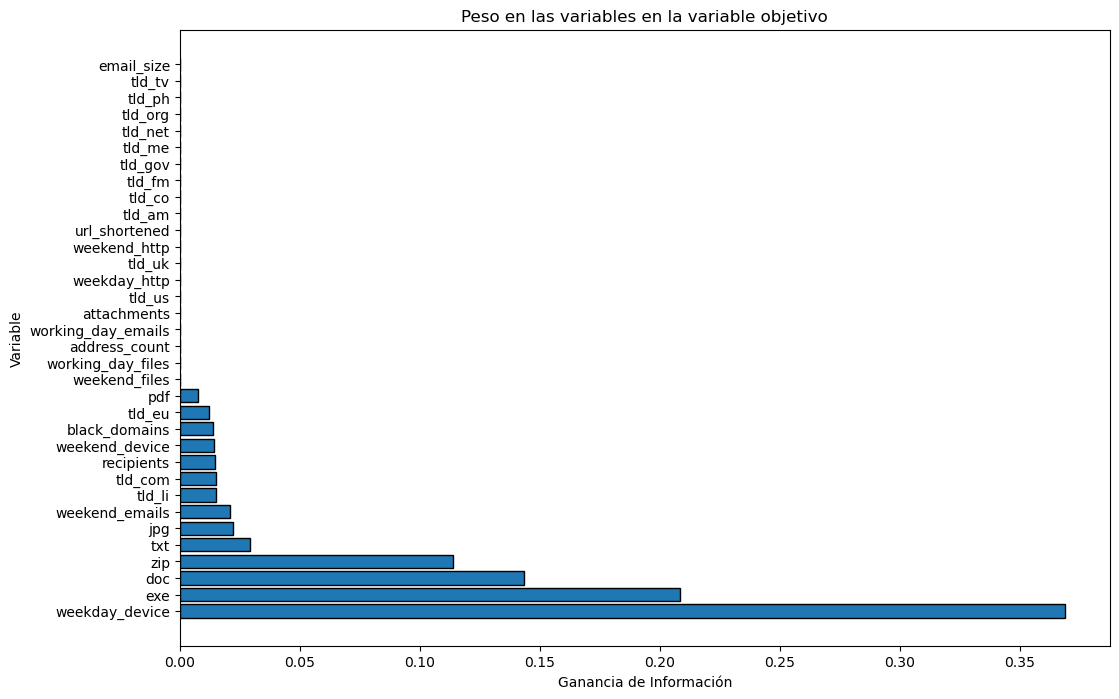

In [7]:
# Dividir los datos en características (X) y objetivo (y)
X = numeric_features_df
y = features_df['insider']

# Entrenar el modelo de árbol de decisión
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X, y)

# Obtener la importancia de las características
feature_importances = tree_classifier.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Graficar la ganancia de información de cada variable en orden descendente
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], edgecolor='black')
plt.xlabel('Ganancia de Información')
plt.ylabel('Variable')
plt.title('Peso en las variables en la variable objetivo')
plt.gca().invert_yaxis()
plt.savefig('../img/information_gain.jpg')
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong> aunque haya escogido la ganancia de información como métrica de selección de características, no voy a tomar como único criterio los pesos obtenidos, sino también el conocimiento que existe sobre el tema a tratar:
    
- Los ficheros txt no contienen contenido malicioso, mientras que otros (pdf, exe, zip) sí pueden serlo.
    
- Las variables relacionadas con el correo (ficheros adjuntos, número de destinatarios) pueden indicar presencia  de ataques a gran escala dentro de una organización.
    
- El número de visitas (weekend_http, weekday_http) lo voy a descartar. La variable black_domains debería        capturar el uso indebido de internet.
    
- El TLD '.com' (junto con otras en menor medida) parece ser un buen indicador, mientras que el resto no parecen aportar nada.
    
- Los enlaces recortados no parecen indicar nada.

In [8]:
# Características resultantes
sel_features = importance_df.reset_index()[13:]['Feature'].tolist()
sel_features.append('email_size')
sel_features.remove('txt')

#Selecciono características
numeric_features_df = numeric_features_df[sel_features]

print('Selected_features:', sel_features)
print('\nTotal numeric features: ', len(sel_features))

Selected_features: ['weekday_http', 'tld_us', 'attachments', 'working_day_emails', 'address_count', 'working_day_files', 'weekend_files', 'pdf', 'tld_eu', 'black_domains', 'weekend_device', 'recipients', 'tld_com', 'tld_li', 'weekend_emails', 'jpg', 'zip', 'doc', 'exe', 'weekday_device', 'email_size']

Total numeric features:  21


In [9]:
#Añado variables categóricas y obtengo dataset normalizado
norm_features_df = pd.concat([features_df['user'], numeric_features_df, features_df.iloc[:, 36:40], 
                              features_df['insider']], axis=1)

#Muestro dataset escalado
norm_features_df.head()

,user,weekday_http,tld_us,attachments,working_day_emails,address_count,working_day_files,weekend_files,pdf,tld_eu,...,zip,doc,exe,weekday_device,email_size,role,functional_unit,department,team,insider
0,LAP0338,0.051151,0.000000,0.348775,0.372399,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.434388,6,5,3,1,0
1,MOH0273,0.219949,0.000000,0.700000,0.057764,0.000000,0.766667,0.846154,0.760023,0.000000,...,0.39069,0.751545,0.117207,0.636364,0.539607,29,2,3,4,0
2,HVB0037,0.342711,0.000000,0.000000,0.226740,0.014286,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.417113,25,1,6,1,0
3,NWK0215,0.342711,0.000000,0.398352,0.000000,0.000000,0.000000,0.000000,0.000000,0.329412,...,0.00000,0.000000,0.000000,0.000000,0.380744,25,1,6,1,0
4,LRR0148,0.342711,0.184388,0.858644,0.057146,0.000000,0.100000,0.115385,0.109035,0.000000,...,0.06250,0.114842,0.011719,0.181818,0.399541,14,4,3,-1,0


## 2. Análisis de Componentes Principales

In [10]:
# Escalo los datos
scaled_features = numeric_features_df #Ya se realizó el scaling (min-max) en apartado 1.1.

# PCA
n_components = 11 #Ajusto para tener una varianza explicada en torno al 90%
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# Guardo componentes principales en dataframe
principal_df = pd.DataFrame(data=principal_components)

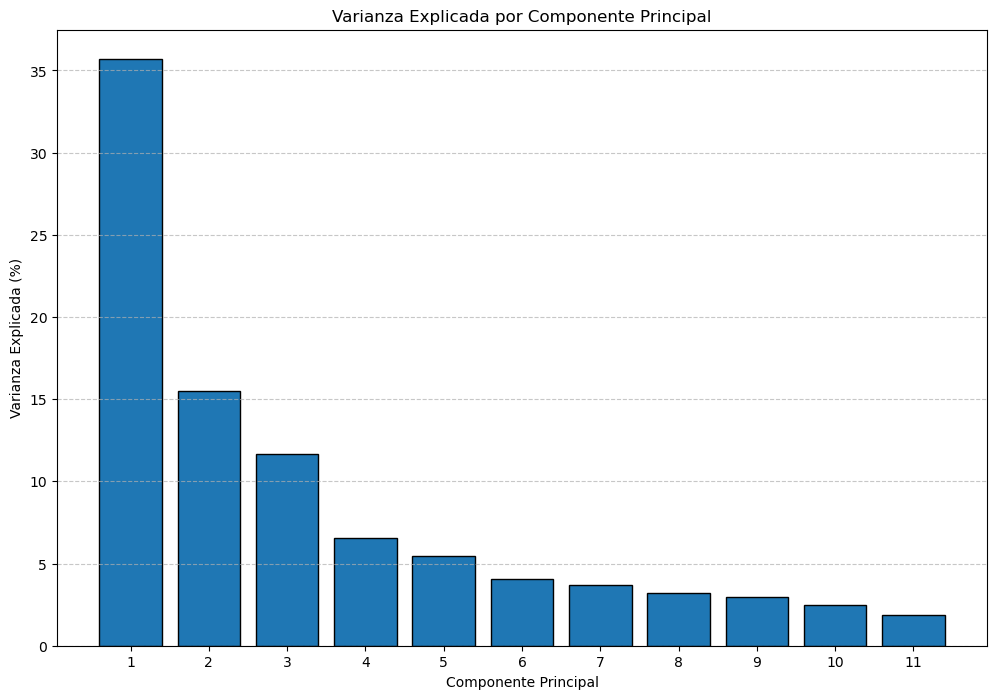

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_ * 100

#Diagrama de barras - Porcentaje de varianza explicada
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, edgecolor='black')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.title('Varianza Explicada por Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../img/pca_bar.jpg')
plt.show()

In [12]:
total_variance = explained_variance_ratio.sum()
print("Varianza total explicada con {} componentes principales: {}%".format(n_components, np.round(total_variance, 2)))

Varianza total explicada con 11 componentes principales: 93.17%


In [13]:
#Añado variables categóricas y variable objetivo
principal_df['user'] = features_df['user']
principal_df['insider'] = features_df['insider']
principal_df = pd.concat([principal_df, features_df.iloc[:, 36:40]], axis=1)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,10,user,insider,role,functional_unit,department,team
0,-0.162207,-0.019432,-0.218240,0.081748,0.206498,-0.045874,-0.084232,-0.060588,0.028058,0.002462,-0.052678,LAP0338,0,6,5,3,1
1,1.670731,0.300706,0.015176,0.663917,-0.027845,-0.114193,-0.093711,-0.070987,0.277303,0.016919,0.495195,MOH0273,0,29,2,3,4
2,-0.083678,-0.364924,0.315093,0.487232,0.167211,-0.209944,-0.073705,-0.156884,-0.132734,-0.116018,-0.306301,HVB0037,0,25,1,6,1
3,-0.082985,0.031606,0.357544,0.491859,-0.054759,-0.214744,-0.187198,0.154940,-0.160258,-0.082224,-0.303209,NWK0215,0,25,1,6,1
4,0.230613,0.489592,0.340274,0.587796,0.043653,-0.033204,0.038231,-0.095249,-0.093199,0.169564,-0.212260,LRR0148,0,14,4,3,-1


In [14]:
#Exporto espacio de características reducido
principal_df.to_csv('features_pca.csv')